In [21]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
import pandas as pd
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from PIL import Image
import os
import PIL

In [4]:
TEST_IMG_DIR = "/Users/gauravkumar/Downloads/Data/isic-2024-challenge/train-image/image/"
TEST_CSV_DIR = "/Users/gauravkumar/Downloads/Data/isic-2024-challenge/train-metadata.csv"
modelSavePath = '/Users/gauravkumar/Downloads/my_model3.h5'

In [5]:
csv_data = pd.read_csv(TEST_CSV_DIR, low_memory=False);

In [6]:
csv_data.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [7]:
def getCropImgs(img, needRotations=False):
    # img = img.convert('L')
    z = np.asarray(img, dtype=np.int8)
    c = []
    for i in range(3):
        for j in range(4):
            crop = z[512 * i:512 * (i + 1), 512 * j:512 * (j + 1), :]

            c.append(crop)
            if needRotations:
                c.append(np.rot90(np.rot90(crop)))

    # os.system('cls')
    # print("Crop imgs", c[2].shape)

    return c

In [8]:
data_new = csv_data[['isic_id', 'target']]

In [9]:
data_new.columns

Index(['isic_id', 'target'], dtype='object')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(csv_data, csv_data['target'], test_size=0.33, random_state=4,
                                                    stratify=csv_data['target'])

In [11]:
x_train.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [12]:
print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

14778995
7279250
268709
132350


In [13]:
def defModel(input_shape):
    X_input = Input(input_shape)

    # The max pooling layers use a stride equal to the pooling size

    X = Conv2D(16, (3, 3), strides=(1, 1))(X_input)  # 'Conv.Layer(1)'

    X = Activation('relu')(X)

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(2)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Conv.Layer(3)

    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(4)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(5)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(5) will be 82x82, we want 84x84

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(6)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(7)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(7) will be 40x40, we want 42x42

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(8)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Con.Layer(9)

    X = Activation('relu')(X)

    X = Flatten()(X)  # Convert it to FC

    X = Dense(256, activation='relu')(X)  # F.C. layer(10)

    X = Dense(128, activation='relu')(X)  # F.C. layer(11)

    X = Dense(4, activation='softmax')(X)

    # ------------------------------------------------------------------------------

    model = Model(inputs=X_input, outputs=X, name='Model')

    return model

In [14]:
def defModel(input_shape):
    X_input = Input(input_shape)

    # The max pooling layers use a stride equal to the pooling size

    X = Conv2D(16, (3, 3), strides=(1, 1))(X_input)  # 'Conv.Layer(1)'

    X = Activation('relu')(X)

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(2)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Conv.Layer(3)

    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(4)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(5)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(5) will be 82x82, we want 84x84

    X = MaxPooling2D((2, 2), strides=2)(X)  # MP Layer(6)

    X = Conv2D(64, (2, 2), strides=(1, 1))(X)  # Conv.Layer(7)

    X = Activation('relu')(X)

    X = ZeroPadding2D(padding=(2, 2))(X)  # Output of convlayer(7) will be 40x40, we want 42x42

    X = MaxPooling2D((3, 3), strides=3)(X)  # MP Layer(8)

    X = Conv2D(32, (3, 3), strides=(1, 1))(X)  # Con.Layer(9)

    X = Activation('relu')(X)

    X = Flatten()(X)  # Convert it to FC

    X = Dense(256, activation='relu')(X)  # F.C. layer(10)

    X = Dense(128, activation='relu')(X)  # F.C. layer(11)

    X = Dense(4, activation='softmax')(X)

    # ------------------------------------------------------------------------------

    model = Model(inputs=X_input, outputs=X, name='Model')

    return model


In [15]:
# Get the softmax from folder name
def getAsSoftmax(fname):
    if (fname == 'b'):
        return [1, 0]
    else:
        return [0, 1]


In [16]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [17]:
data_new['img'] = data_new.apply(lambda _: '', axis=1)
data_new['imgcrop'] = data_new.apply(lambda _: '', axis=1)

/var/folders/c9/x7lk2dss3bv89ttknvtmys7w0000gn/T/ipykernel_7127/3893093411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['img'] = data_new.apply(lambda _: '', axis=1)
/var/folders/c9/x7lk2dss3bv89ttknvtmys7w0000gn/T/ipykernel_7127/3893093411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['imgcrop'] = data_new.apply(lambda _: '', axis=1)


In [31]:
data_new.columns
image_list = []


In [34]:
def addImageDataToPd(basePath, data_new):
    print("Hello---")
    image_data = os.listdir(basePath)
    print("No# of images in data: " , len(image_data))
    image_files = [f for f in os.listdir(basePath) if f.endswith('.jpg') or f.endswith('.png')]
    # Iterate through the image files
    for image_file in image_files:
       # Open the image file
       img = Image.open(os.path.join(basePath, image_file))
       # Convert the image to an array
       img_array = np.array(img)
       # Append the image array to the list
       image_list.append(img_array)
    
    


In [35]:
addImageDataToPd(TEST_IMG_DIR, data_new)

Hello---
No# of images in data:  401059


In [36]:
df = pd.DataFrame(image_list)
df.head()

/opt/anaconda3/envs/Dev/lib/python3.8/site-packages/pandas/core/internals/construction.py:553: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,"[[[187, 138, 123], [188, 139, 124], [189, 142,..."
1,"[[[170, 105, 85], [167, 105, 84], [165, 103, 8..."
2,"[[[177, 139, 116], [169, 131, 108], [169, 131,..."
3,"[[[169, 115, 103], [175, 121, 109], [178, 124,..."
4,"[[[194, 152, 136], [195, 153, 137], [196, 154,..."


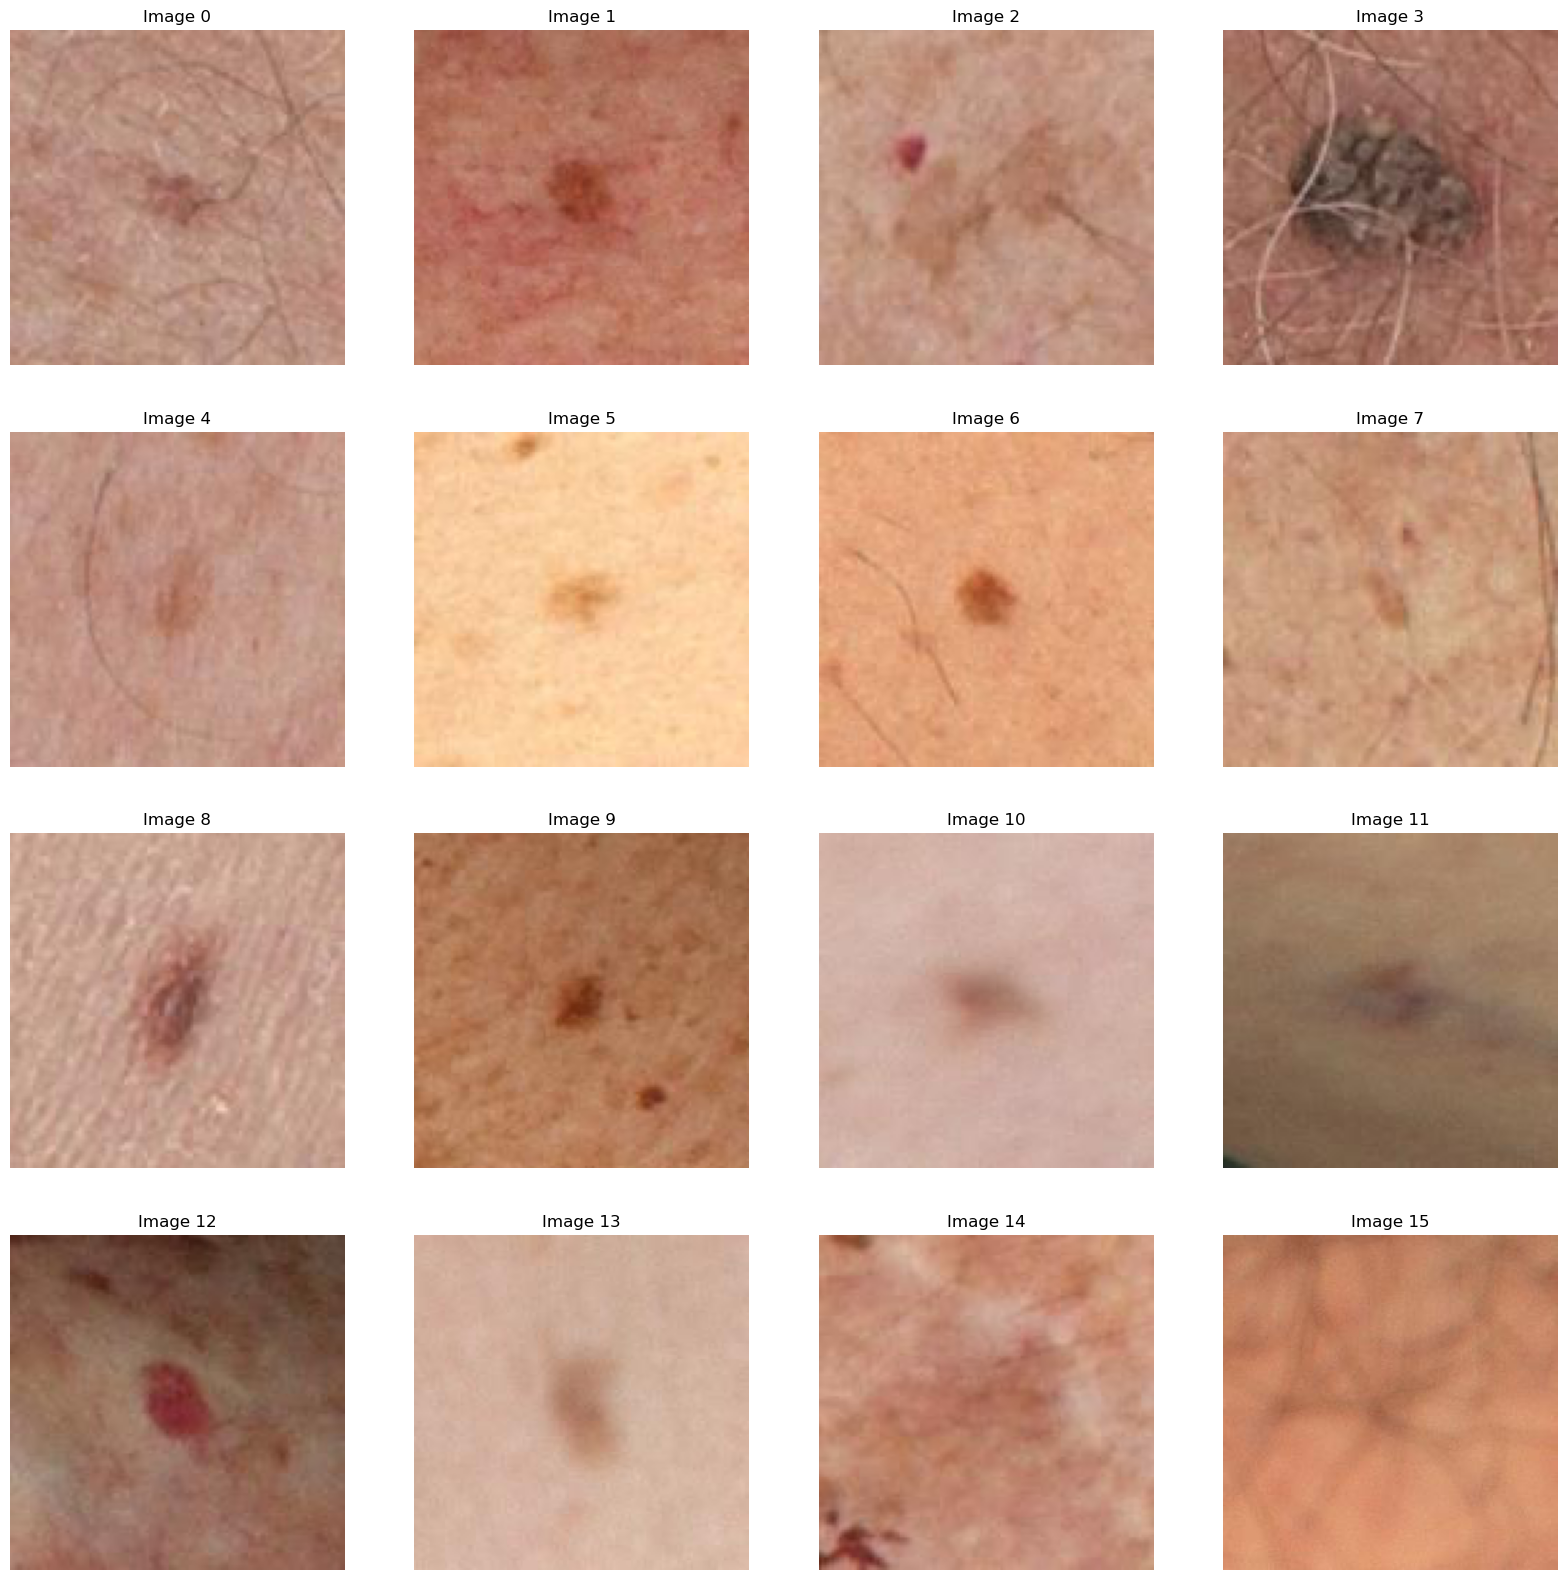

In [37]:
import matplotlib.pyplot as plt

# Get the number of rows in the dataframe
num_rows = df.shape[0]

# Set the number of rows and columns for the grid
rows = 4
cols = 4

# Create a subplot grid with the specified number of rows and columns
fig, ax = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the subplot grid to a 1-D array
ax = ax.ravel()

# Iterate through the rows of the dataframe
for i in range(num_rows):
    try:
        # Get the image array from the dataframe
        img_array = df.iloc[i, 0]
        # Display the image in the current subplot
        ax[i].imshow(img_array)
        ax[i].set_title(f"Image {i}")
        ax[i].axis("off")
    except:
        pass
# Show the plot
plt.show()